## CSE 6054 Extra Credit

Welcome to my extra credit project! Today we will be investigating electric car data! This is very useful for me because i would love to have my own electric car one day! This is basically me subjecting you to my shopping research. Let's load it up! 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path = "EV_cars.csv"
cars = pd.read_csv(path)
cars.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


# Background

What a lovely dataset! Relatively clean! Here's a little more info:

* Battery: The capacity of the vehicle's battery in kilowatt-hours (kWh).
* Car_name: The model name of the electric vehicle.
* Car_name_link: A direct link to the corresponding page on EV Database for more in-depth information.
* Efficiency: The energy efficiency rating of the vehicle in watt-hours per kilometer (Wh/km).
* Fast_charge: The fast-charging capability of the vehicle in minutes for a certain charging percentage. (What percent and everything? No idea) AKA How many minutes a gast charged car would last
* Price.DE.: The price of the electric vehicle in Germany. (So Euroes)
* Range: The driving range of the vehicle on a single charge in kilometers.
* Top_speed: The maximum speed the vehicle can achieve in kilometers per hour.
* Acceleration..0.100.: The acceleration time from 0 to 100 kilometers per hour.

# Problem

I wanna know what the best electric cars on the market are! Who the best makers are, and which one I should get based on my arbitrary 
personal preferences. So with all this data, we can decipher that and help me choose!

# Cleanup 

So we could put units into the columns names, rename the columns to something I believe would be more descriptive, as well as remove any values with NA to cleann this dataset, as this one is rather clean already. I'd also like a column with just the Manufactorer (i.e. Tesla, Byd, etc) Luckily for me, all car model names are up to one word long!

In [3]:
cars = cars.dropna()
new_names = ["Battery", 'Model', 'URL', "Efficiency(Wh/km)", "Fast_Charge(min)", "Price_Germany(Euros)", "Range(km)", 
             "Top_Speed(km/h)", "Acceleration_0to100(km/h)"] 
cars.columns = new_names

cars["Manufacturer"] = cars["Model"].str.split().str[0]

print("Unique Manfacturer Number:", len(cars.Manufacturer.unique()), " vs Total Number of Cars:", len(cars))
cars.head()

Unique Manfacturer Number: 45  vs Total Number of Cars: 307


,Battery,Model,URL,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Manufacturer
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0,Tesla
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1,Tesla
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3,BYD
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9,MG
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4,Tesla


Eveyone's looking for the nicest cars and everything, and features tend to be costly. But that doesn't mean that the most expensive car is always the most optimal.

It's quite possible that some qualities correlate well with price and others don't! (Plus it's a way of identifying outliers) Let's investigate!

# Exploration

We'll start off by seeing how expensive each Manufacturer is on average because I am very curious. Let's also see the top 5 most expensive and top 5 least expensive, with their respective mean costs.

Let's make a function to help us make print and plot orur data


In [4]:
def plot_print_5(df, group, number, title, ylabel=""):
    """
    Given a data frame, a groupby variable and a numerical variable to take the mean of, return the top 5, bottom 5
    and a bar plot of said data
    df: Pandas Dataframe
    group: str represnting column name of group in given data frame
    number: str represnting column name of group in given data frame
    title: str represnting title of plot
    ylabel: str represnting unit for the ylabel
    """
    assert group in df.columns, f"Column '{group}' does not exist in the DataFrame."
    assert number in df.columns, f"Column '{number}' does not exist in the DataFrame."

    print(df.groupby(group)[number].mean().sort_values(ascending=False).head(5))
    print(df.groupby(group)[number].mean().sort_values(ascending=True).head(5))
    df.groupby(group)[number].mean().plot(kind = "bar", title = title, ylabel = ylabel)

    return None #Placeholder
    

Manufacturer
Lucid      166600.000000
Porsche    136131.111111
Lotus      123490.000000
Jaguar      92400.000000
BMW         88920.000000
Name: Price_Germany(Euros), dtype: float64
Manufacturer
Dacia     23550.0
Mazda     35990.0
Mini      36300.0
Jeep      37000.0
Abarth    39490.0
Name: Price_Germany(Euros), dtype: float64


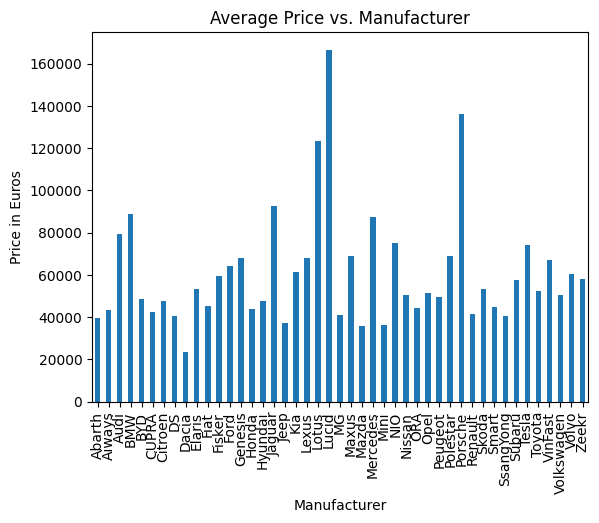

In [5]:
plot_print_5(cars, "Manufacturer", "Price_Germany(Euros)", "Average Price vs. Manufacturer", "Price in Euros")

Here we see that Lucid is by far the most expensive, along whithe Porsche and Lotus. While Dacia and e.Go are much cheaper. And Dacia and Mazda are the cheapest.

Now Let's see who has the best battery life

Manufacturer
Lotus      109.000000
Lucid      106.400000
VinFast     99.466667
Fisker      98.625000
Audi        88.142857
Name: Battery, dtype: float64
Manufacturer
Dacia     25.00
Mazda     30.00
Abarth    37.80
Mini      38.95
Fiat      43.39
Name: Battery, dtype: float64


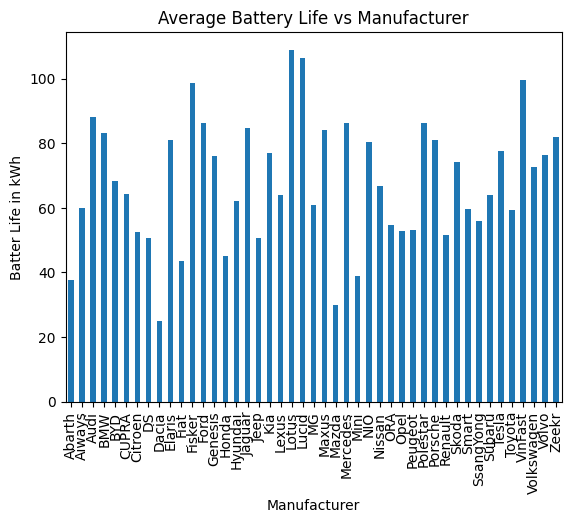

In [6]:
plot_print_5(cars, "Manufacturer", "Battery", "Average Battery Life vs Manufacturer", "Batter Life in kWh")

Okay, so far Lucid can justify the price but in terms of best battery life, it's a little all over the place. For lowest battery life, it looks like you get what you pay for.

Now let's try Efficency! That's a very important thing in todays age

Manufacturer
Lotus     230.000000
Maxus     230.000000
Toyota    226.000000
Jaguar    223.000000
Opel      222.266667
Name: Efficiency(Wh/km), dtype: float64
Manufacturer
Dacia     154.0
Mini      159.5
Jeep      164.0
Lucid     166.4
Abarth    168.0
Name: Efficiency(Wh/km), dtype: float64


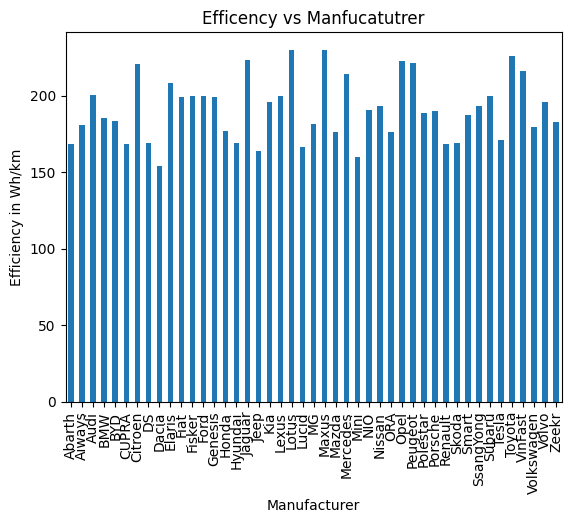

In [7]:
plot_print_5(cars, "Manufacturer", "Efficiency(Wh/km)", "Efficency vs Manfucatutrer", "Efficiency in Wh/km")

Interesting results! Lotus so far has a great batery life and is efficent! Lucid is very disapointing in this regard, at nottom 3, but the Dacia and Mini are
repeatedly very meh in ranking. However, very little variability in this one compared to the other ones!

How fast does each manufacuter model charge?

Manufacturer
Porsche    1050.555556
Lotus       995.000000
Genesis     920.000000
Lucid       902.000000
Kia         754.444444
Name: Fast_Charge(min), dtype: float64
Manufacturer
Dacia     175.000000
Mazda     210.000000
ORA       236.666667
Honda     240.000000
Elaris    290.000000
Name: Fast_Charge(min), dtype: float64


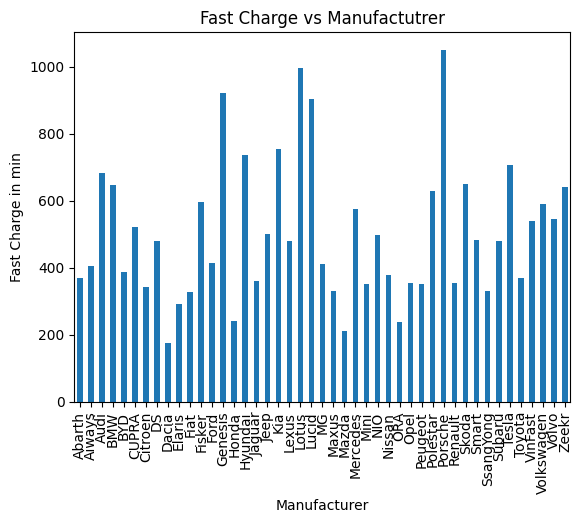

In [8]:
plot_print_5(cars, "Manufacturer", "Fast_Charge(min)", "Fast Charge vs Manufactutrer", "Fast Charge in min")

Much higher variability! Lotus still looking nice overall, and Porsche. While Dacis is still rather low. Guess this isn't the most important variable to a lot of manufactureres. But if you've had a dead phone and needed to do something, you;d know how important this is! Road trips are hard enough for electric cars and you need to charge them to go, and quickly!

Speaking of Road Trips. Let's check out Range!

Manufacturer
Lucid       637.000000
Fisker      493.750000
Lotus       475.000000
VinFast     456.666667
Polestar    455.833333
Name: Range(km), dtype: float64
Manufacturer
Dacia     162.5
Mazda     170.0
Fiat      216.5
Abarth    225.0
Opel      244.0
Name: Range(km), dtype: float64


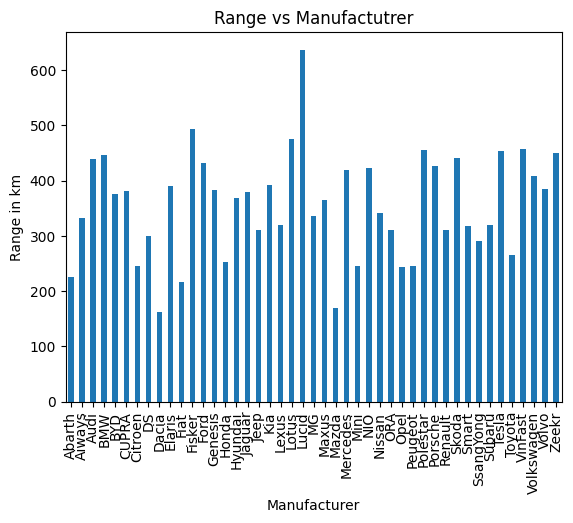

In [9]:
plot_print_5(cars, "Manufacturer", "Range(km)", "Range vs Manufactutrer", "Range in km")

Okay, Lucid's back at it with the range, also high on variability! Dacia and Mazda still with lower metrics

What about if I have a need for speed?

Manufacturer
Lotus      255.000000
Lucid      252.000000
Porsche    245.555556
Tesla      234.700000
Genesis    223.750000
Name: Top_Speed(km/h), dtype: float64
Manufacturer
Dacia      125.000000
Citroen    136.333333
Peugeot    138.666667
Fiat       139.000000
Mazda      140.000000
Name: Top_Speed(km/h), dtype: float64


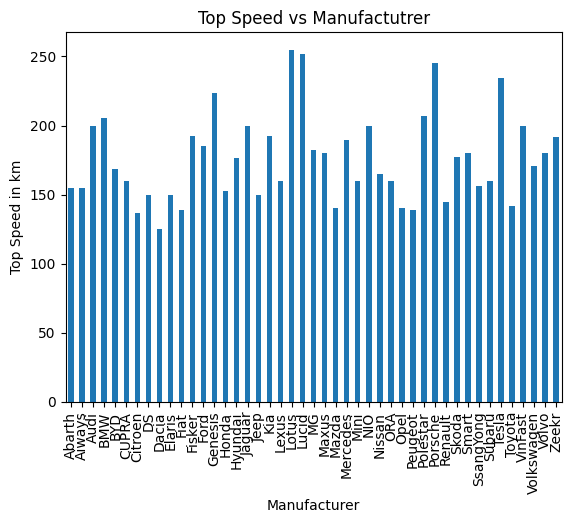

In [10]:
plot_print_5(cars, "Manufacturer", "Top_Speed(km/h)", "Top Speed vs Manufactutrer", "Top Speed in km")

Some variability with Lotus, Lucid and Porsche again in top 3! Dacis is still here, some new players in the bootom 5 though.

Finally, acceleration!

Manufacturer
Dacia      16.400000
Peugeot    11.813333
Citroen    11.693333
Opel       11.300000
Toyota     10.500000
Name: Acceleration_0to100(km/h), dtype: float64
Manufacturer
Lucid      3.200000
Lotus      3.700000
Porsche    4.022222
NIO        4.040000
Tesla      4.480000
Name: Acceleration_0to100(km/h), dtype: float64


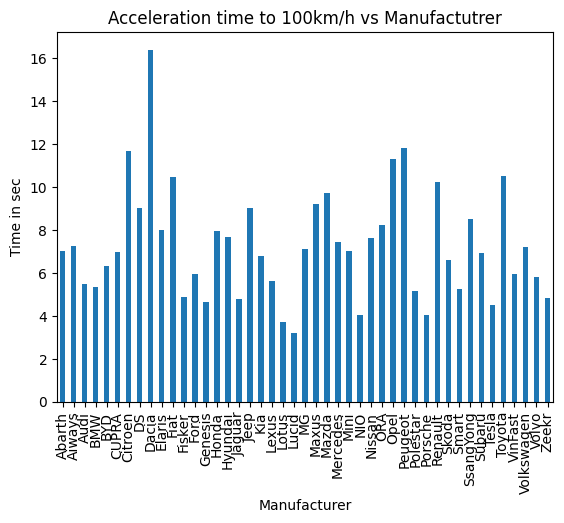

In [11]:
plot_print_5(cars, "Manufacturer", "Acceleration_0to100(km/h)", "Acceleration time to 100km/h vs Manufactutrer", "Time in sec")

Here, small numbers are optimal, instead of big ones. So LLP is back in top 3, and Dacia is still very meh

Let's see how well everything correlates. We'll take out URL and Model right now because that's for later and those values are unique to each car

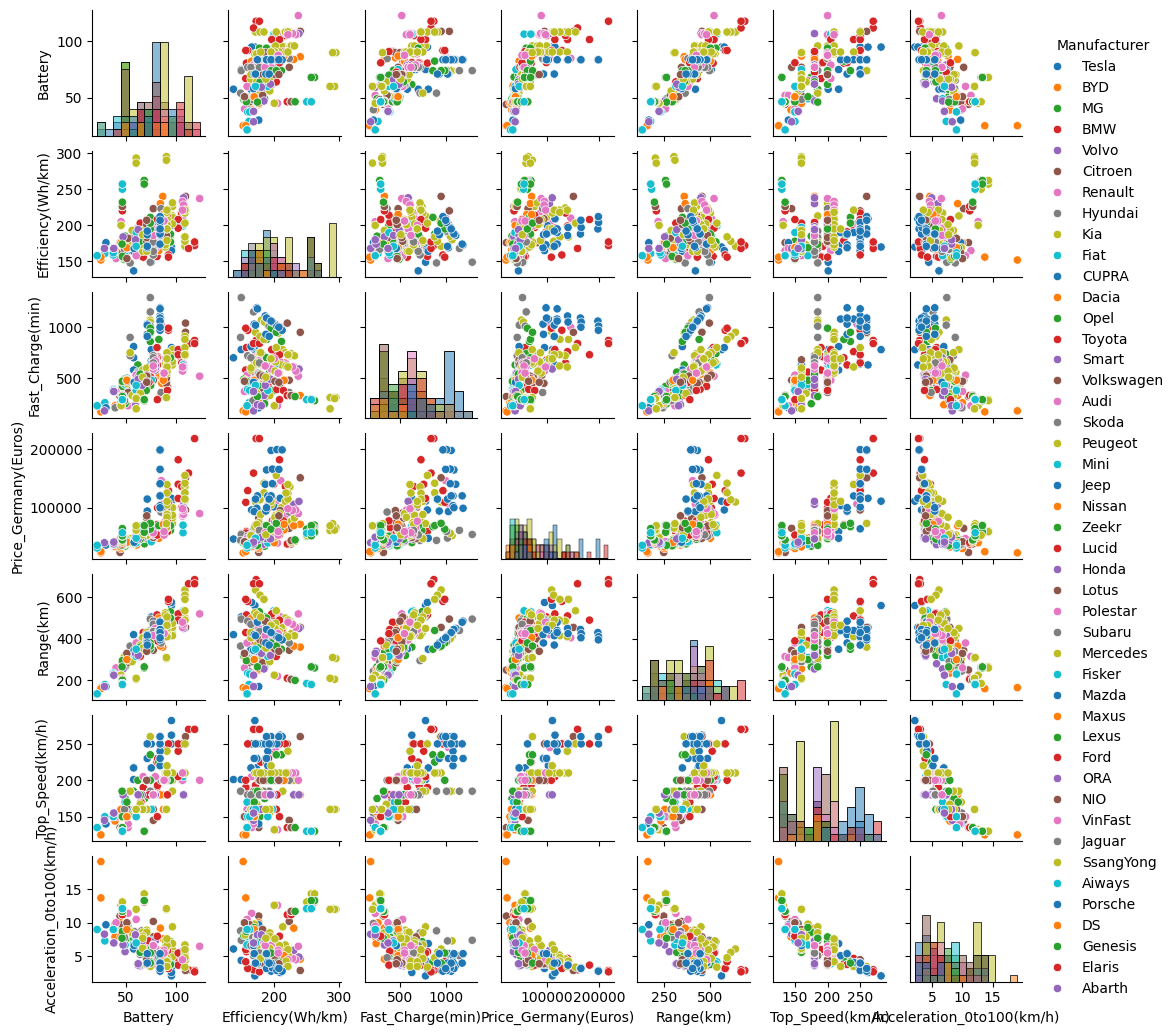

In [12]:
car_cor = cars.copy()
del car_cor["URL"]
del car_cor["Model"]
sns.pairplot(car_cor, diag_kind="hist", hue ="Manufacturer", height=1.5, palette='tab10')

I don't expect you to be able to determine the manufactueres from this graph, more that it looked plain all one colour
this allows for some visualisation, and here we see how well each variable correlates to another

It does look like more expensive is better overall, but for some variables, the bennefit for more expensive begins to plateau

What's interesting is how well range and fast charging time correlate. Similar to battery life and top speed. Those too correlating are a
good sign of quality. Meaning that last long, work hard, and recharge fast!

# Ranking Models

So let's extract the top 5  best Manufactuters and Models! But with so many variables, how do you know wat's best? Great question! Well that's always going to be aribtrrary, since "best" means different things to different people! One approach is to make every variable of equal importance and see who comes out on top, on each, but imagine if we different points to two models that are really similar in one area, and give those same points to two models that are very different in another, just because of overall ranking? Doable, but it doesn't reflect how it's possible for some manufactuerers to really lead the pack in some areas.

So we will give everything a score! Then we'll extract the top ranking model and the top rnking manufacturers.

The first thing we need to do is min-max scaling, so each variable is of an equalish range, while keeping variance the same


In [13]:
#Ro do min max scaling without scikit learn, we need to temporaily removal "Manufacturerer" since it's categorical
manu = car_cor["Manufacturer"]

cars_scaled = car_cor.copy()
del cars_scaled["Manufacturer"]
cars_scaled = (cars_scaled - cars_scaled.min()) / (cars_scaled.max() - cars_scaled.min())

cars_scaled

,Battery,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h)
0,0.528024,0.221519,0.446429,0.186580,0.545455,0.585987,0.170588
1,0.355949,0.000000,0.473214,0.121105,0.518182,0.484076,0.235294
2,0.385447,0.291139,0.178571,0.112944,0.354545,0.222930,0.305882
3,0.397247,0.215190,0.410714,0.089230,0.409091,0.222930,0.341176
4,0.528024,0.075949,0.544643,0.167153,0.672727,0.484076,0.135294
...,...,...,...,...,...,...,...
355,0.245821,0.759494,0.107143,0.154413,0.081818,0.031847,0.588235
356,0.245821,0.715190,0.107143,0.171092,0.090909,0.031847,0.588235
357,0.245821,0.759494,0.107143,0.149783,0.081818,0.031847,0.588235
358,0.459194,0.759494,0.107143,0.238936,0.236364,0.031847,0.658824


Now let's give everything a weight! We could give everything an equalish weight, but since we're making this suited to me, I'll make it most custom.

Firstly, it's important to establish that Values we want to be high are given a positive weight. Values we want to be low are given a negative weight. (One way to do it, it has it's drawbacks, but works for me) The greater the importance is, the higher the absolute value for this variable. Then we we will simplu sum up the given numbers to calculate a de facto score. To do this, all critera must add up to 1, for a tital score of 1.

Here's the order of importance and the corresponding weights I will give them

1. Efficiency - 0.5
2. Battery - 0.35
3. Price  - -0.325
4. Range- 0.275
5. Fast Charge - 0.25 
6. Acceleration - -0.1
7. Top Speed 0.05

Let's just set thes weights and assert they equal to one

In [14]:
weights = {
    "Battery": 0.35,
    "Efficiency(Wh/km)": 0.5,
    "Fast_Charge(min)": 0.25,
    "Price_Germany(Euros)": -0.325,
    "Range(km)": 0.275,
    "Top_Speed(km/h)": 0.05,
    "Acceleration_0to100(km/h)": -0.1
}

sum(weights.values())

1.0000000000000002

We'll just call that negligible and move on! Time to compute the score!

In [15]:
cars_scaled['Score'] = (cars_scaled * pd.Series(weights)).sum(axis=1)
cars_scaled["Manufacturer"] = manu
cars_scaled

,Battery,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Score,Manufacturer
0,0.528024,0.221519,0.446429,0.186580,0.545455,0.585987,0.170588,0.508777,Tesla
1,0.355949,0.000000,0.473214,0.121105,0.518182,0.484076,0.235294,0.346701,Tesla
2,0.385447,0.291139,0.178571,0.112944,0.354545,0.222930,0.305882,0.366470,BYD
3,0.397247,0.215190,0.410714,0.089230,0.409091,0.222930,0.341176,0.409839,MG
4,0.528024,0.075949,0.544643,0.167153,0.672727,0.484076,0.135294,0.500293,Tesla
...,...,...,...,...,...,...,...,...,...
355,0.245821,0.759494,0.107143,0.154413,0.081818,0.031847,0.588235,0.407655,Citroen
356,0.245821,0.715190,0.107143,0.171092,0.090909,0.031847,0.588235,0.382582,Fiat
357,0.245821,0.759494,0.107143,0.149783,0.081818,0.031847,0.588235,0.409159,Opel
358,0.459194,0.759494,0.107143,0.238936,0.236364,0.031847,0.658824,0.490306,Opel


Now Let's give this the plot print treatment for a quick peak and print the top 10!

Manufacturer
Lotus      0.814418
VinFast    0.690344
Fisker     0.681827
Genesis    0.618000
Audi       0.606996
Name: Score, dtype: float64
Manufacturer
Dacia    -0.004383
Mazda     0.117510
Mini      0.186583
Abarth    0.197091
Honda     0.220729
Name: Score, dtype: float64


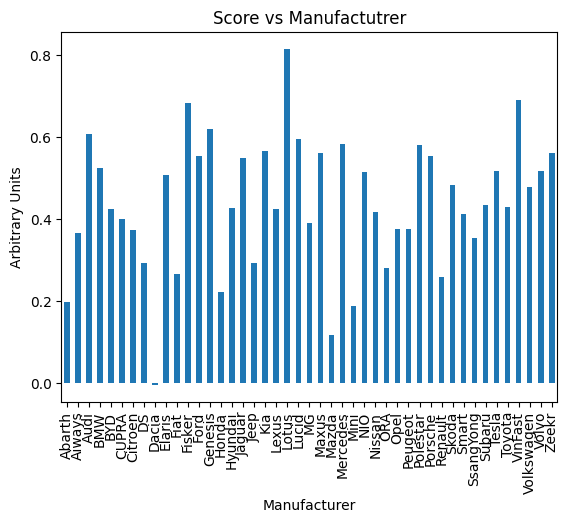

In [16]:
plot_print_5(cars_scaled, "Manufacturer", "Score", "Score vs Manufactutrer", "Arbitrary Units")

Well according to my very arbitrary score system, value varies greatly across manufacturers! Lotus came out on top and Dacia is somehow so bad, they 
would hav to pay me to drive one! 

Let's actually replace any negative value with 0 and see how that influences thing

Manufacturer
Lotus      0.814418
VinFast    0.690344
Fisker     0.681827
Genesis    0.618000
Audi       0.606996
Name: Score, dtype: float64
Manufacturer
Dacia     0.006900
Mazda     0.117510
Mini      0.186583
Abarth    0.197091
Honda     0.220729
Name: Score, dtype: float64


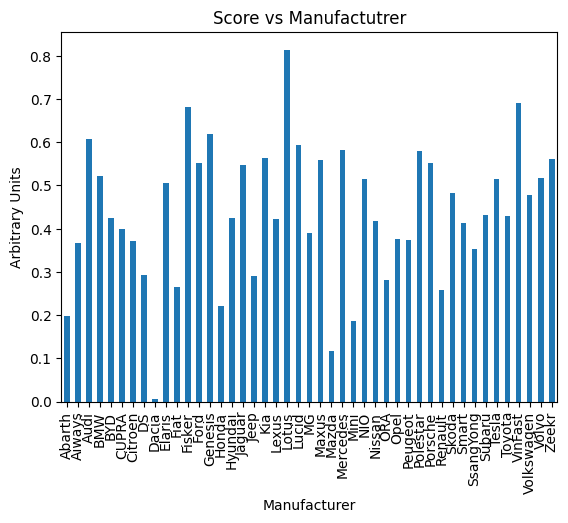

In [17]:
cars_scaled['Score'] = cars_scaled['Score'].apply(lambda x:max(x,0))

plot_print_5(cars_scaled, "Manufacturer", "Score", "Score vs Manufactutrer", "Arbitrary Units")

That made, virtually no difference, but at least it's clean! It's completely arbitrary anyway!

# Best Manufacturers
We do have our top 5 manufacturers now! Now let's do a pairplot again with only those ones.

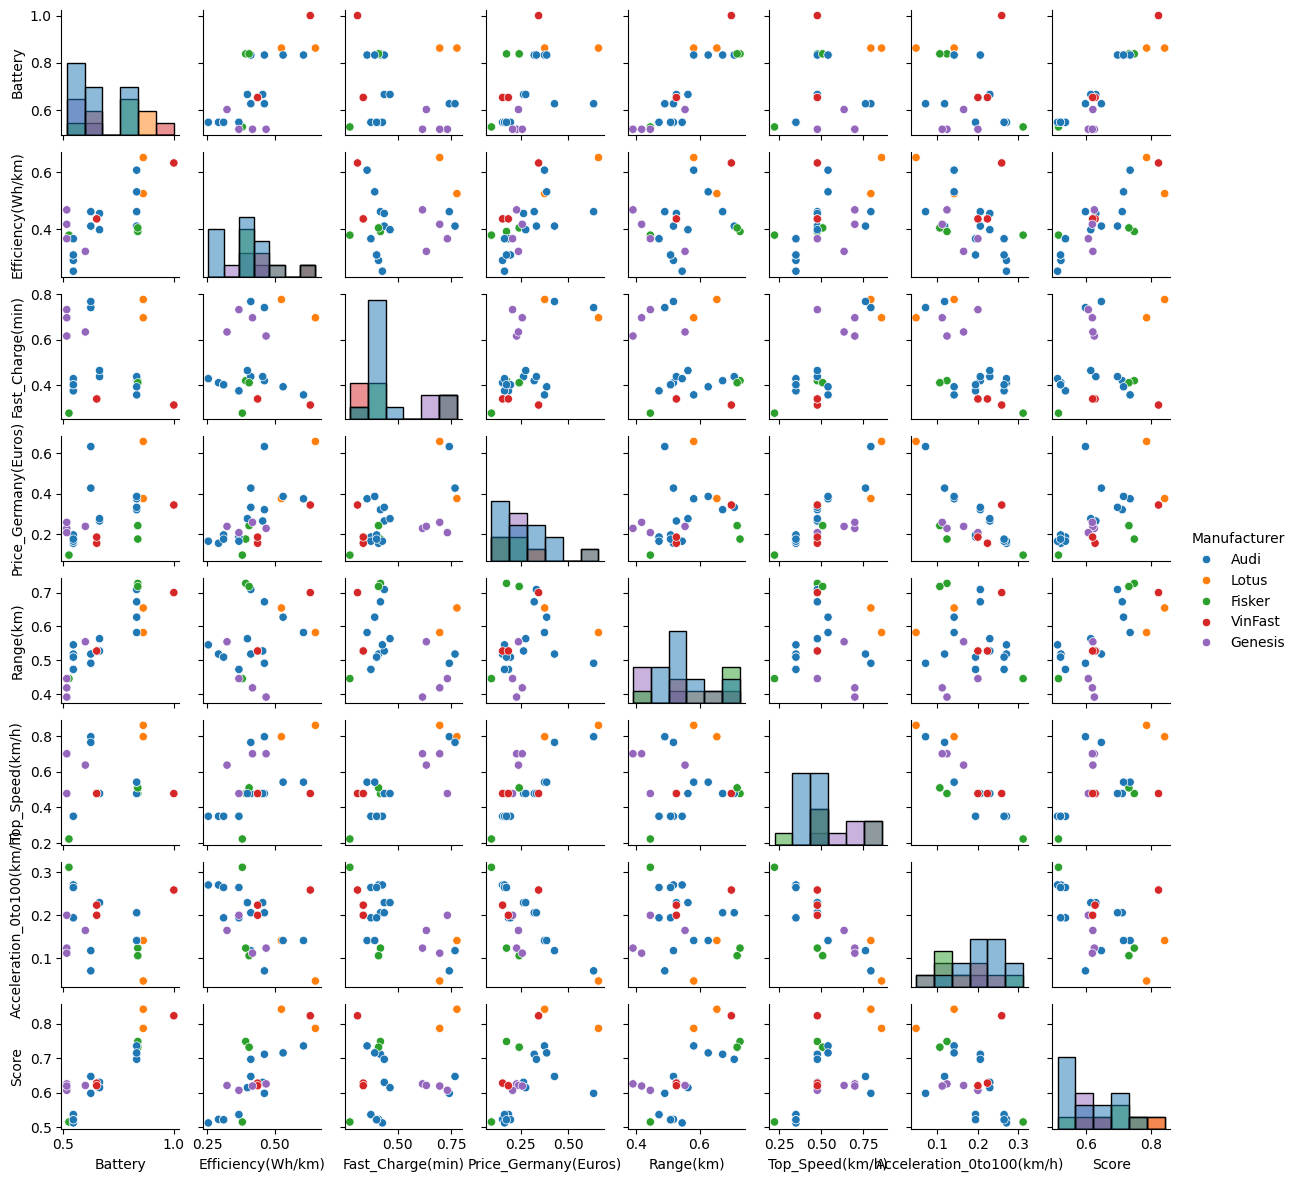

In [18]:
top5 = cars_scaled.groupby("Manufacturer")["Score"].mean().sort_values(ascending=False).head(5).index.tolist()

cars_top5 = cars_scaled[cars_scaled['Manufacturer'].isin(top5)]
sns.pairplot(cars_top5, diag_kind="hist", hue ="Manufacturer", height=1.5, palette='tab10')

So much more understandable right? Of course, this correlation plot will reflect the bias we put into the weights. Plus now we see how having only so many 
cars per manufacturer makes things look skewed if you want to compare them. We can see these 5 are similarish in some regards, and not in others.

Other than Fast Charge, it doesn't seem like one manufacturer really focuses on one factor above all else, in comparison. that's neither good nor bad, it just is what it is. Ngl, dissapointed Tesla wasn't here because that's more feasible to get in my area...

# Best Cars

I mean, the 5 best cars for me could all come from different manufacturers! Plus I want to know which one it is!

Let's add back Model and URL so we can visit them later! Then we'll see the final results

In [19]:
cars_best5 = cars_scaled.copy()

best_5 = list(cars_scaled["Score"].sort_values(ascending=False).head(5))
cars_best5 = cars_best5[cars_best5["Score"].isin(best_5)]
cars_best5['Model'] = cars["Model"]
cars_best5['URL'] = cars["URL"]
cars_best5 = cars_best5.sort_values('Score', ascending=False)

cars_best5

,Battery,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Score,Manufacturer,Model,URL
75,0.862340,0.525316,0.776786,0.375748,0.654545,0.796178,0.141176,0.842247,Lotus,Lotus Eletre,https://ev-database.org/car/1767/Lotus-Eletre
154,1.000000,0.632911,0.312500,0.344027,0.700000,0.477707,0.258824,0.823275,VinFast,VinFast VF 9 Extended Range,https://ev-database.org/car/1811/VinFast-VF-9-...
170,0.862340,0.651899,0.696429,0.657150,0.581818,0.859873,0.047059,0.786590,Lotus,Lotus Eletre R,https://ev-database.org/car/1768/Lotus-Eletre-R
99,0.837758,0.392405,0.419643,0.176260,0.727273,0.477707,0.123529,0.748577,Fisker,Fisker Ocean Ultra,https://ev-database.org/car/1710/Fisker-Ocean-...
219,0.842675,0.575949,0.392857,0.371706,0.609091,0.541401,0.152941,0.739596,Polestar,Polestar 3 Long Range Performance,https://ev-database.org/car/1759/Polestar-3-Lo...


Guess Lotus Strikes again! The Lotus Eletre... Love the name! Sounds fancy! Very me! They did rank really well in so many places!
Let's extract the unscaled specs and chck out that URL!

In [20]:
best_car = list(cars_best5['Model'].head(1))

display(cars[cars['Model'].isin(best_car)])
cars[cars['Model'].isin(best_car)]['URL']

,Battery,Model,URL,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Manufacturer
75,109.0,Lotus Eletre,https://ev-database.org/car/1767/Lotus-Eletre,220,1040.0,95990.0,495,250,4.5,Lotus


75    https://ev-database.org/car/1767/Lotus-Eletre
Name: URL, dtype: object

Okay... not loving that pricepoint. Guess it knocked down Lucid. But damn it looks nice! I love it tbh! I'm actually very happy! But I can't wait but want to
see the top 5 stats and URL to see if I can salvage a slightly cheaper alternative...

In [21]:
best_5_index = cars_scaled["Score"].sort_values(ascending=False).head(5).index.tolist()

display(cars.loc[best_5_index])
# This is to get it to display the full URL
pd.set_option('display.max_colwidth', 100)
cars.loc[best_5_index]['URL']

,Battery,Model,URL,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Manufacturer
75,109.0,Lotus Eletre,https://ev-database.org/car/1767/Lotus-Eletre,220,1040.0,95990.0,495,250,4.5,Lotus
154,123.0,VinFast VF 9 Extended Range,https://ev-database.org/car/1811/VinFast-VF-9-...,237,520.0,89790.0,520,200,6.5,VinFast
170,109.0,Lotus Eletre R,https://ev-database.org/car/1768/Lotus-Eletre-R,240,950.0,150990.0,455,260,2.9,Lotus
99,106.5,Fisker Ocean Ultra,https://ev-database.org/car/1710/Fisker-Ocean-...,199,640.0,57000.0,535,200,4.2,Fisker
219,107.0,Polestar 3 Long Range Performance,https://ev-database.org/car/1759/Polestar-3-Lo...,228,610.0,95200.0,470,210,4.7,Polestar


75                          https://ev-database.org/car/1767/Lotus-Eletre
154          https://ev-database.org/car/1811/VinFast-VF-9-Extended-Range
170                       https://ev-database.org/car/1768/Lotus-Eletre-R
99                    https://ev-database.org/car/1710/Fisker-Ocean-Ultra
219    https://ev-database.org/car/1759/Polestar-3-Long-Range-Performance
Name: URL, dtype: object

But for almost half the price the Fisker Ocean Ultra is pretty damn good! and landed at top 4! It also has great range! IRL I guess I'd get that one and paint it yellow or something. I could drive across the country more easily!

But Vinfast VF 9 is prertty damn good for an expensive car, I must say!

# Thoughts and Further Analysis

Tesla's officialy overrated. Elon is quaking,

Okay but actually, since each manufacturer might have differing numbers of models with different specicifties in mnd when designing the car, an average over all models chart, might not be the best at helping us discern what manufacturer is most likely to have the car you want, maybe just their speciality

I'm most dissapointed that this dataset didn't include number of seats, car interior material, if they have those doors that rise up to
open, so many cool things! Even trunk storage size is missing. For my personal preferences, that would play a non-zero role in my choice. So I'm not 100%  sure I would go with that car it chose!

If I really had a budget, I could have filtered out a pricepoint from the get-go, but I didn't, and was really curious... Then instead of making price's weight negative, I could have tried inverteing the weight, or something. Obviously, this was incredibly aribtrary research, but it would fit eco-concious people.

Maybe I don't need to go on road-trips and can succeed with only so much range? That doesn't neccesarily mean I need to filter out cars with too much though, but maybe it's useful up to a point? 

Also, just specs wise in top 5, I liked the VinFast one more! But it also had 6 seats, which don't nodody need. But it doubles as trunk space, which is always seductive. So we could try updating the weights more, like a real neural network

# Further Work

This is the part I'm doing after the project is done becuz I'm so curious yeah! If I set my budget to 80000 Euros, would would come out on top?

In [22]:
cheap_cars = cars[cars['Price_Germany(Euros)'] < 60000]
cheap_scaled = cheap_cars.copy()
cheap_url = cheap_cars['URL']
cheap_model = cheap_cars['Model']
cheap_manu =  cheap_cars["Manufacturer"]

del cheap_scaled['URL']
del cheap_scaled['Model']
del cheap_scaled["Manufacturer"]

cheap_scaled = (cheap_scaled - cheap_scaled.min()) / (cheap_scaled.max() - cheap_scaled.min())

cheap_scaled

,Battery,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h)
0,0.630282,0.280,0.446429,0.975053,0.7500,1.000000,0.090323
1,0.424883,0.000,0.473214,0.632888,0.7125,0.826087,0.161290
2,0.460094,0.368,0.178571,0.590241,0.4875,0.380435,0.238710
3,0.474178,0.272,0.410714,0.466310,0.5625,0.380435,0.277419
4,0.630282,0.096,0.544643,0.873529,0.9250,0.826087,0.051613
...,...,...,...,...,...,...,...
354,0.293427,0.904,0.107143,0.806952,0.1250,0.054348,0.612903
355,0.293427,0.960,0.107143,0.806952,0.1125,0.054348,0.548387
356,0.293427,0.904,0.107143,0.894118,0.1250,0.054348,0.548387
357,0.293427,0.960,0.107143,0.782754,0.1125,0.054348,0.548387


In [23]:
cheap_scaled['Score'] = (cheap_scaled * pd.Series(weights)).sum(axis=1)
cheap_scaled["Manufacturer"] = cheap_manu
cheap_scaled

,Battery,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Score,Manufacturer
0,0.630282,0.280,0.446429,0.975053,0.7500,1.000000,0.090323,0.402531,Tesla
1,0.424883,0.000,0.473214,0.632888,0.7125,0.826087,0.161290,0.282437,Tesla
2,0.460094,0.368,0.178571,0.590241,0.4875,0.380435,0.238710,0.327061,BYD
3,0.474178,0.272,0.410714,0.466310,0.5625,0.380435,0.277419,0.399058,MG
4,0.630282,0.096,0.544643,0.873529,0.9250,0.826087,0.051613,0.411380,Tesla
...,...,...,...,...,...,...,...,...,...
354,0.293427,0.904,0.107143,0.806952,0.1250,0.054348,0.612903,0.295028,Peugeot
355,0.293427,0.960,0.107143,0.806952,0.1125,0.054348,0.548387,0.326042,Citroen
356,0.293427,0.904,0.107143,0.894118,0.1250,0.054348,0.548387,0.273151,Fiat
357,0.293427,0.960,0.107143,0.782754,0.1125,0.054348,0.548387,0.333906,Opel


In [24]:
def best_x(df, x, model, url):
    """
    Return a df of the best x cars by score when given a df of cars already given a score

    args:
    df: Pandas dataframe of scored call data
    x: Integerer representing top x car scores
    Model: Car model name as pandas series
    URL: UrL of cars
    
    """
    cars_best = df.copy()
    best_x = list(cars_best["Score"].sort_values(ascending=False).head(x))
    cars_best = cars_best[cars_best["Score"].isin(best_x)]
    cars_best['Model'] = model
    cars_best['URL'] = url
    cars_best = cars_best.sort_values('Score', ascending=False)

    return cars_best


In [25]:
cheap_5_scaled = best_x(cheap_scaled, 5, cheap_model, cheap_url)
cheap_5_scaled

,Battery,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Score,Manufacturer,Model,URL
99,1.000000,0.496,0.419643,0.921123,1.0000,0.815217,0.038710,0.715436,Fisker,Fisker Ocean Ultra,https://ev-database.org/car/1710/Fisker-Ocean-Ultra
290,0.779343,0.552,0.339286,0.813904,0.7250,0.815217,0.148387,0.594370,VinFast,VinFast VF 8 Eco Extended Range,https://ev-database.org/car/1807/VinFast-VF-8-Eco-Extended-Range
71,0.618545,0.424,0.758929,0.677807,0.6375,0.652174,0.238710,0.581986,Hyundai,Hyundai IONIQ 5 Long Range 2WD,https://ev-database.org/car/1662/Hyundai-IONIQ-5-Long-Range-2WD
312,0.779343,0.552,0.339286,0.971658,0.7250,0.815217,0.122581,0.545680,VinFast,VinFast VF 8 Plus Extended Range,https://ev-database.org/car/1809/VinFast-VF-8-Plus-Extended-Range
35,0.618545,0.344,0.803571,0.787166,0.6875,0.652174,0.238710,0.531355,Kia,Kia EV6 Long Range 2WD,https://ev-database.org/car/1481/Kia-EV6-Long-Range-2WD


In [29]:
def unscale(scaled_df, unscaled_df, x = 0):
    if x == 0:
        x = len(scaled_df)
    indeces = scaled_df["Score"].sort_values(ascending=False).head(x).index.tolist()
    df = unscaled_df.loc[indeces]

    return df

cheap_5_o = unscale(cheap_5_scaled, cheap_cars, 5)
display(cheap_5_o)
cheap_5_o['URL']

,Battery,Model,URL,Efficiency(Wh/km),Fast_Charge(min),Price_Germany(Euros),Range(km),Top_Speed(km/h),Acceleration_0to100(km/h),Manufacturer
99,106.5,Fisker Ocean Ultra,https://ev-database.org/car/1710/Fisker-Ocean-Ultra,199,640.0,57000.0,535,200,4.2,Fisker
290,87.7,VinFast VF 8 Eco Extended Range,https://ev-database.org/car/1807/VinFast-VF-8-Eco-Extended-Range,206,550.0,52990.0,425,200,5.9,VinFast
71,74.0,Hyundai IONIQ 5 Long Range 2WD,https://ev-database.org/car/1662/Hyundai-IONIQ-5-Long-Range-2WD,190,1020.0,47900.0,390,185,7.3,Hyundai
312,87.7,VinFast VF 8 Plus Extended Range,https://ev-database.org/car/1809/VinFast-VF-8-Plus-Extended-Range,206,550.0,58890.0,425,200,5.5,VinFast
35,74.0,Kia EV6 Long Range 2WD,https://ev-database.org/car/1481/Kia-EV6-Long-Range-2WD,180,1070.0,51990.0,410,185,7.3,Kia


99                   https://ev-database.org/car/1710/Fisker-Ocean-Ultra
290     https://ev-database.org/car/1807/VinFast-VF-8-Eco-Extended-Range
71       https://ev-database.org/car/1662/Hyundai-IONIQ-5-Long-Range-2WD
312    https://ev-database.org/car/1809/VinFast-VF-8-Plus-Extended-Range
35               https://ev-database.org/car/1481/Kia-EV6-Long-Range-2WD
Name: URL, dtype: object